In [ ]:
# import libraries
import os
import glob
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import keras
from keras.models import Sequential
from tensorflow.keras import optimizers
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = "/content/drive/MyDrive/train"
test = "/content/drive/MyDrive/test"

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train)
num_classes=len(glob.glob(train+"/*"))
test_samples=get_files(test)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

15 Classes
16521 Train images
4120 Test images


In [ ]:
# Preprocessing
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 16520 images belonging to 15 classes.
Found 4120 images belonging to 15 classes.


In [ ]:
train_generator.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
# Create Model.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 23104)             0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


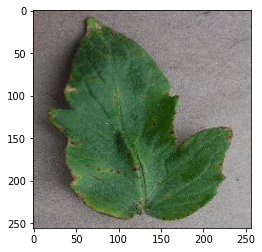

In [ ]:
from keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/train/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG')
plt.imshow(img1);

#preprocessing image
img1 = image.load_img('/content/drive/MyDrive/train/Tomato_Bacterial_spot/0045ba29-ed1b-43b4-afde-719cc7adefdb___GCREC_Bact.Sp 6254.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
from keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)
conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_features = flatten_output.predict(img)

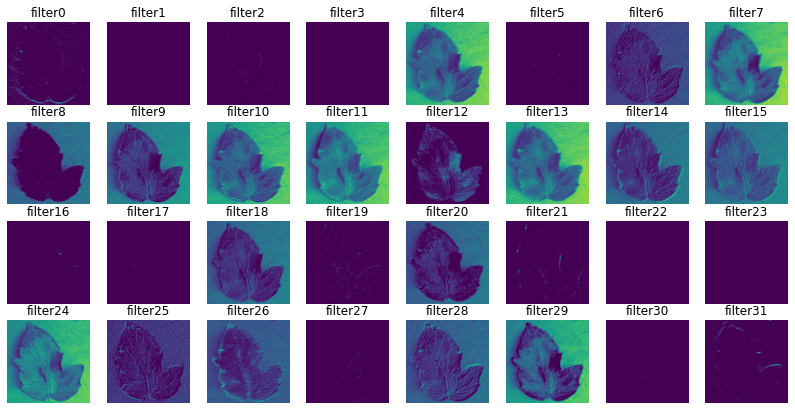

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') 
plt.show()

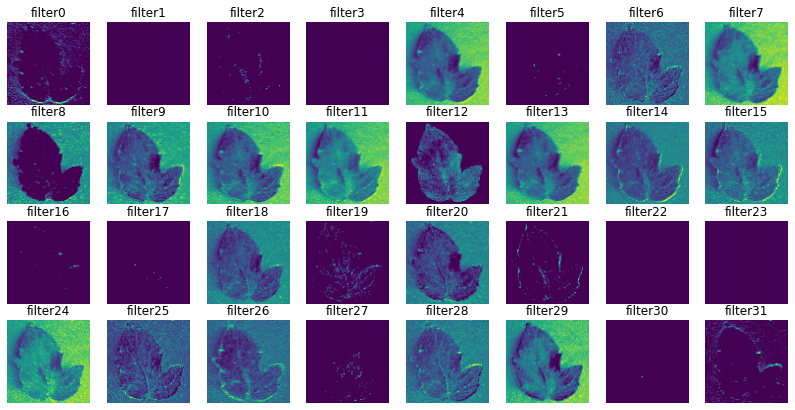

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

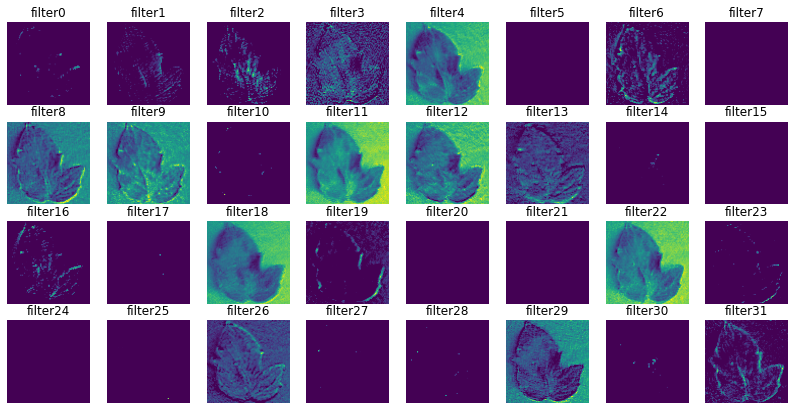

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

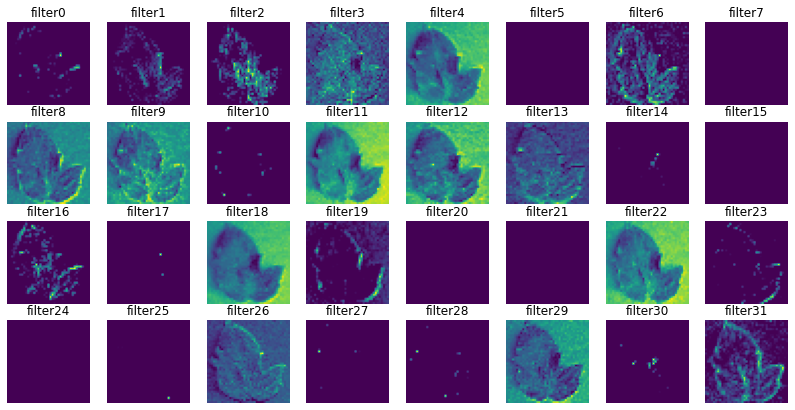

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

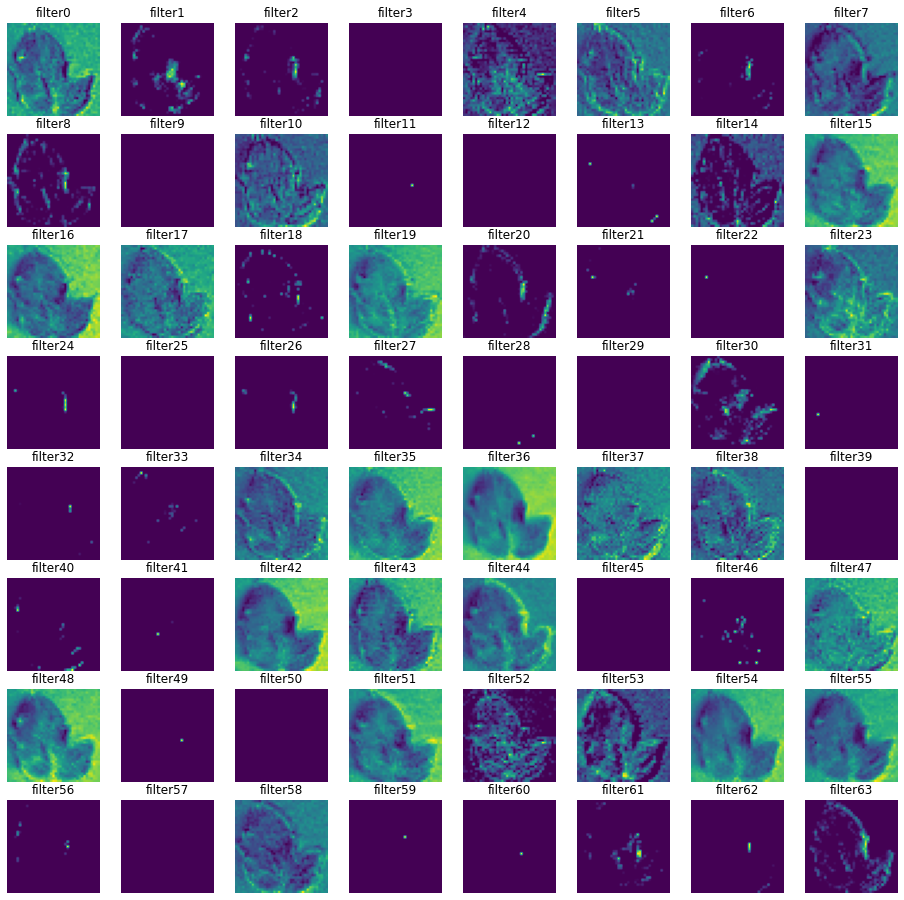

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

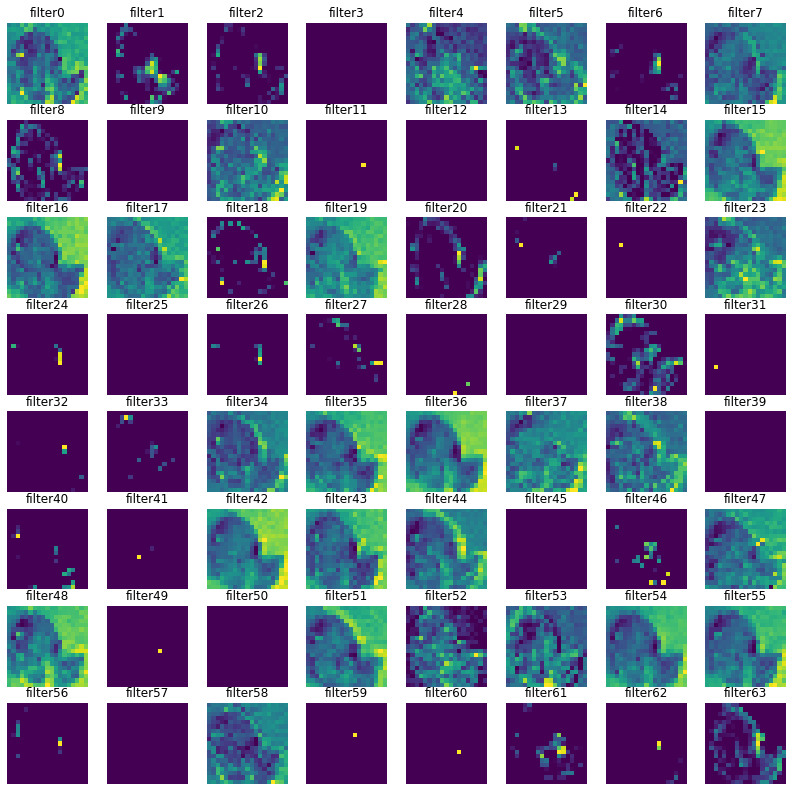

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,14))
columns = 8
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i],cmap='viridis')
plt.show()

Training Model

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train, 
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 16520 images belonging to 15 classes.


In [ ]:
import datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train = model.fit_generator(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)



Epoch 1/10
516/516 [==============================] - 3814s 7s/step - loss: 1.4246 - accuracy: 0.5366 - val_loss: 0.7259 - val_accuracy: 0.7646
Epoch 2/10
516/516 [==============================] - 548s 1s/step - loss: 0.6962 - accuracy: 0.7653 - val_loss: 0.4369 - val_accuracy: 0.8507
Epoch 3/10
516/516 [==============================] - 548s 1s/step - loss: 0.4973 - accuracy: 0.8305 - val_loss: 0.3899 - val_accuracy: 0.8672
Epoch 4/10
516/516 [==============================] - 553s 1s/step - loss: 0.4192 - accuracy: 0.8550 - val_loss: 0.3710 - val_accuracy: 0.8740
Epoch 5/10
516/516 [==============================] - 554s 1s/step - loss: 0.3401 - accuracy: 0.8845 - val_loss: 0.2433 - val_accuracy: 0.9144
Epoch 6/10
516/516 [==============================] - 552s 1s/step - loss: 0.2787 - accuracy: 0.9046 - val_loss: 0.1797 - val_accuracy: 0.9380
Epoch 7/10
516/516 [==============================] - 557s 1s/step - loss: 0.2654 - accuracy: 0.9098 - val_loss: 0.2226 - val_accuracy: 0.921

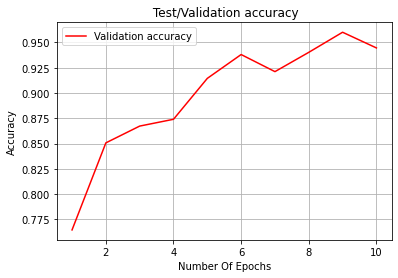

In [ ]:
#Train and validation accuracy
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
epochs = range(1, len(acc) + 1)
#plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title(' Test/Validation accuracy')
plt.ylabel("Accuracy")
plt.xlabel("Number Of Epochs")
plt.grid()
plt.legend()
plt.show()


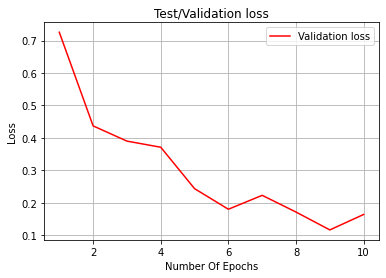

In [ ]:
#Train and validation loss
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Test/Validation loss')
plt.ylabel("Loss")
plt.xlabel("Number Of Epochs")
plt.grid()
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

129/129 [==============================] - 994s 8s/step - loss: 0.2577 - accuracy: 0.9180
Test score is 0.2576752007007599
Test accuracy is 0.9179611802101135


In [ ]:
from keras.models import load_model
model.save('crop.h5')

In [ ]:
from keras.models import load_model
model.save_weights('crop_weights.h5')

In [ ]:
classes = train_generator.class_indices 
classes

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

In [ ]:
from keras.models import load_model
model=load_model('crop.h5')

classes = ["Pepper__bell___Bacterial_spot","Pepper__bell___healthy","Potato___Early_blight","Potato___Late_blight","Potato___healthy",
           "Tomato___Bacterial_spot","Tomato___Early_blight","Tomato___Late_blight","Tomato___Leaf_Mold","Tomato___Septoria_leaf_spot",
           "Tomato___Spider_mites_Two-spotted_spider_mite","Tomato___Target_Spot","Tomato___Tomato_mosaic_virus","Tomato___healthy"]

Prediction

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_width=256
img_height=256

from keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict_Classes([prepare('/content/drive/MyDrive/test/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG')])
disease=image.load_img('/content/drive/MyDrive/test/Potato___Early_blight/00d8f10f-5038-4e0f-bb58-0b885ddc0cc5___RS_Early.B 8722.JPG')
plt.imshow(disease)
print (classes[int(result)])